In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

def line(x, m, b):
    return m * x + b

# Chapter 8.

## A Murder in Ceylon

In [2]:
time = np.array([0, 120, 240, 360])
water = np.zeros(4)
insulated = np.zeros(4)
milk = np.zeros(4)
beer = np.zeros(4)

In [3]:
water[0] = 79

insulated[0] = 79.8

# milk[0] = 

- Sri Lankan woman found dead
- Husband is the chief suspect
- Her whereabouts known up to a point
- His whereabouts known after a point

<img src="images/timeline.png">

<img src="images/legend.png", align="left">

- How can we determine what happened?

## Background

- First formulated by Newton ca. late 16$^{th}$ / early 17$^{th}$ century
- Published in _Philosophical Transactions of the Royal Society_ in 1701
- Newton observed that as an object cools the rate of loss of heat energy is proportional to temperature difference between the hot material and its surroundings: $\Delta T = -k(T - T_0)$
    - The concept of temperature is rooted in qualitative ideas of “hot” and “cold”
    - Energy which is transferred solely because of a temperature difference is called heat

<img src="images/philtrans.jpeg">

In [4]:
water[1] = 72

insulated[1] = 71

# milk[1] = 

## Cooling

- Heat transfer in 3 ways:
    - Conduction
    - Radiation
    - Convection
- Table mostly made of wood - poor conductor
- Thermal radiation $\propto T^4$ - Stefan Boltzmann law
- Convection between material and surrounding air

<img src="images/Heat-Transfer-1.jpg">

- Here we will use the following:
    - Energy $\propto$ Mass (true)
    - Energy $\propto$ Temperature (sometimes true)
- $\Delta E~\not\propto$ mass
- Energy lost through surface only
- $\Delta E \propto$ surface area

In [5]:
water[2] = 63

insulated[2] = 65.5

# milk[2] = 

- $\frac{dT}{dt} = -k~(T-T_0)$


- general differential equation:
    - $\frac{dy}{dt}=-ky$
    - $y(t) = y_o~ e^{-kt}$
    
    
- so our initial ODE becomes:
    - $T(t)=T_0~+~(T-T_0)~e^{-kt}$
  
  
- $k$ here is a property of the hot material:
    - $k=\frac{A}{mC}~$ or $~k = \frac{A}{mCR}$
    - where $A$ is the surface area, $m$ the mass, $C$ the heat capacity, $R$ the insulation factor

In [6]:
def exp(t, T, T_0, k):
    return (T-T_0) * np.exp(-k*t) + T_0

## Conclusion / Applications / Relevance

- Newton's Law of Cooling
    - Not a real law
    - Approximate relation
- Applications:
    - Forensic pathology
    - Solar water heaters
    - Determining the time taken for a capacitor to discharge
    - Radioactive decay

In [7]:
water[3] = 62

insulated[3] = 64

# milk[3] = 

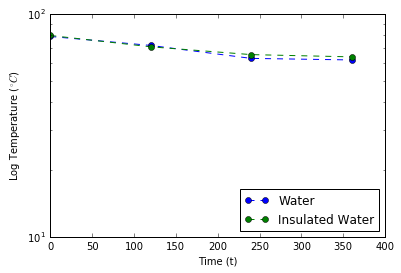

In [49]:
plt.semilogy(time, water, '--o', label='Water')
plt.semilogy(time, insulated, '--o', label='Insulated Water')
# plt.semilogy(time, milk, label='Milk')
# plt.semilogy(time, beer, label='Beer')

plt.xlabel('Time (t)')
plt.ylabel(r'Log Temperature ($^{\circ}C$)')
plt.legend(loc='lower right')
plt.savefig('semilog.png')

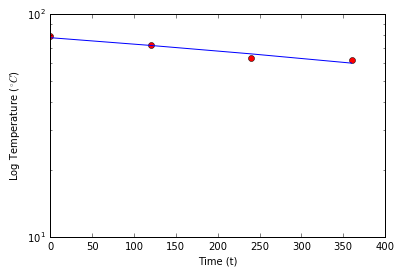

In [50]:
popt, pcov = curve_fit(line, time, water)

plt.semilogy(time, water, 'ro')
plt.semilogy(time, line(time, *popt))

plt.xlabel('Time (t)')
plt.ylabel(r'Log Temperature ($^{\circ}C$)')
plt.savefig('semilog_fit.png')

In [53]:
plt.plot(time, water, '--bo', label='Water')
plt.plot(time, insulated, '--ro', label='Insulated Water')
# plt.plot(time, milk, fmt='o', label='Milk')
# plt.plot(time, beer, fmt='o', label='Beer')

plt.xlabel('Time (t)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.legend()
plt.savefig('linear.png')

In [9]:
A = 0.057 # surface area
C = 4.186 # specific heat capacity of water
k = A / (0.2 * C)

popt1, pcov1 = curve_fit(exp, time, water, p0=(70, 20, k))
fit_time = np.arange(0, 360, 1)

plt.scatter(time, water)
plt.plot(fit_time, exp(fit_time, *popt1), 'r')

plt.xlabel('Time (t)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.savefig('linear_fit.png')

/home/damien/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
